# Student Info
- CSC15004 - Statistical Machine Learning
- 21CNTThuc - 21127135 - Diep Huu Phuc

In [ ]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
# which is a derivative work from original NIST datasets.
# MNIST dataset is made available under the terms of the
# Creative Commons Attribution-Share Alike 3.0 license.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Multi-Class Classification

This Colab explores multi-class classification problems through the classic MNIST dataset.

## Learning Objectives:

After doing this Colab, you'll know how to do the following:

  * Understand the classic MNIST problem.
  * Create a deep neural network that performs multi-class classification.
  * Tune the deep neural network.

This exercise introduces image classification with machine learning.

## The Dataset
  
This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.

Each example contains a pixel map showing how a person wrote a digit. For example, the following images shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after the input data is normalized).

![Two images. The first image shows a somewhat fuzzy digit one. The second image shows a 14x14 floating-point array in which most of the cells contain 0 but a few cells contain values between 0.0 and 1.0. The pattern of nonzero values corresponds to the image of the fuzzy digit in the first image.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each example in the MNIST dataset consists of:

* A label specified by a [rater](https://developers.google.com/machine-learning/glossary/#rater).  Each label must be an integer from 0 to 9.  For example, in the preceding image, the rater would almost certainly assign the label `1` to the example.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

This is a multi-class classification problem with 10 output classes, one for each digit.

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [43]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# Additionals for Task 2
from sklearn.metrics import classification_report, confusion_matrix

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

## Load the dataset

`tf.keras` provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

* Loads both the training set and the test set.
* Separates each set into features and labels.

The relevant convenience function for MNIST is called `mnist.load_data()`:

In [31]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

Notice that `mnist.load_data()` returned four separate values:

* `x_train` contains the training set's features.
* `y_train` contains the training set's labels.
* `x_test` contains the test set's features.
* `y_test` contains the test set's labels.

**Note:** The MNIST .csv training set is already shuffled.

## View the dataset

The .csv file for the California Housing Dataset contains column names (for example, `latitude`, `longitude`, `population`). By contrast, the .csv file for MNIST does not contain column names. Instead of column names, you use ordinal numbers to access different subsets of the MNIST dataset. In fact, it is probably best to think of `x_train` and `x_test` as two-dimensional NumPy arrays:  



In [ ]:
# Output example #2917 of the training set.
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 110, 250, 254, 254, 254, 254, 254, 254, 254, 254, 184,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 216, 254, 254, 254, 254, 254, 254, 254, 254, 254, 251,  54,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3, 131, 197,  68, 137, 101,  83,  41,  70, 221, 254, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 254, 254,  24,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  83, 247, 254, 192,  10,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 124, 254, 254, 250,  47,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 113, 178, 250, 254, 254, 254, 252, 178, 128,  50,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  69, 252, 254, 254, 254, 254, 254, 254, 254, 254, 153,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 141, 252, 254, 241, 241, 254, 247, 252, 254, 254, 153,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  68,  82,   5,   5,  82,  37,  65, 167, 254, 190,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 162, 254, 153,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 172, 253,  75,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 102, 254, 152,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 230, 216,  20,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  71, 222, 254, 142,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  66, 254, 254, 157,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4,  34,  34,  78, 161, 226, 249, 254, 154,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  96, 184, 254, 254, 254, 254, 254, 249,  93,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

Alternatively, you can call `matplotlib.pyplot.imshow` to interpret the preceding numeric array as an image.

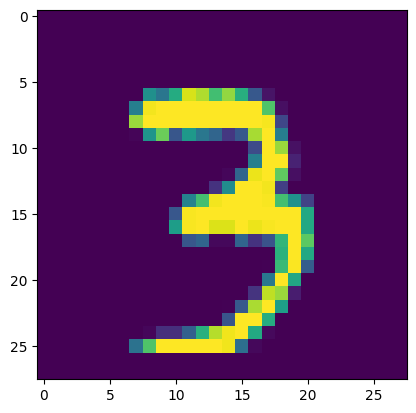

In [ ]:
# Use false colors to visualize the array.
plt.imshow(x_train[2917])

In [ ]:
# Output row #10 of example #2917.
x_train[2917][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [ ]:
# Output pixel #16 of row #10 of example #2900.
x_train[2900][10][16]

0

## Task 1: Normalize feature values

Complete the following code cell to map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. Store the floating-point values in `x_train_normalized` and `x_test_normalized`.

In [32]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2900][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


In [ ]:
#@title Double-click to see a solution to Task 1.

x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2900][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


## Define a plotting function

The following function plots an accuracy curve:

In [33]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


## Create a deep neural net model

The `create_model` function defines the topography of the deep neural net, specifying the following:

* The number of [layers](https://developers.google.com/machine-learning/glossary/#layer) in the deep neural net.
* The number of [nodes](https://developers.google.com/machine-learning/glossary/#node) in each layer.
* Any [regularization](https://developers.google.com/machine-learning/glossary/#regularization) layers.

The `create_model` function also defines the [activation function](https://developers.google.com/machine-learning/glossary/#activation_function) of each layer.  The activation function of the output layer is [softmax](https://developers.google.com/machine-learning/glossary/#softmax), which will yield 10 different outputs for each example. Each of the 10 outputs provides the probability that the input example is a certain digit.

**Note:** Unlike several of the recent Colabs, this exercise does not define feature columns or a feature layer.  Instead, the model will train on the NumPy array.

In [34]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""

  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array.
  # Flatten that two-dimensional array into a one-dimensional
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))

  # Define a dropout regularization layer.
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  # Construct the layers into a model that TensorFlow can execute.
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

  return model

def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True,
                      validation_split=validation_split)

  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

## Invoke the previous functions

Run the following code cell to invoke the preceding functions and actually train the model on the training set.

**Note:** Due to several factors (for example, more examples and a more complex neural network) training MNIST might take longer than training the California Housing Dataset.

Epoch 1/50
12/12 [==============================] - 1s 66ms/step - loss: 1.6699 - accuracy: 0.4795 - val_loss: 0.9612 - val_accuracy: 0.7629
Epoch 2/50
12/12 [==============================] - 1s 54ms/step - loss: 0.8976 - accuracy: 0.7314 - val_loss: 0.5536 - val_accuracy: 0.8646
Epoch 3/50
12/12 [==============================] - 1s 49ms/step - loss: 0.6464 - accuracy: 0.8092 - val_loss: 0.4332 - val_accuracy: 0.8878
Epoch 4/50
12/12 [==============================] - 1s 51ms/step - loss: 0.5382 - accuracy: 0.8426 - val_loss: 0.3685 - val_accuracy: 0.9019
Epoch 5/50
12/12 [==============================] - 1s 44ms/step - loss: 0.4764 - accuracy: 0.8597 - val_loss: 0.3326 - val_accuracy: 0.9112
Epoch 6/50
12/12 [==============================] - 1s 43ms/step - loss: 0.4351 - accuracy: 0.8730 - val_loss: 0.3076 - val_accuracy: 0.9168
Epoch 7/50
12/12 [==============================] - 1s 54ms/step - loss: 0.4094 - accuracy: 0.8798 - val_loss: 0.2899 - val_accuracy: 0.9204
Epoch 8/50
12

[0.1540880799293518, 0.9573000073432922]

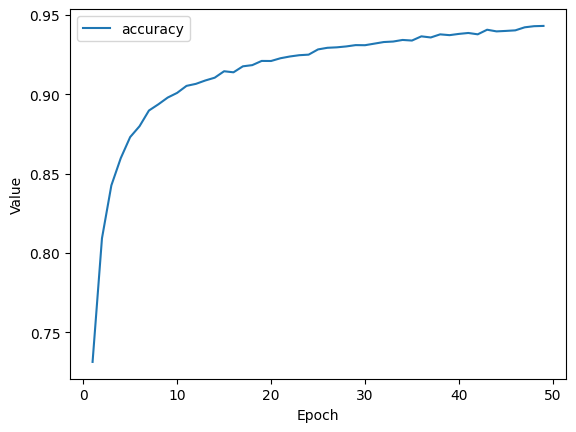

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train,
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

## Task 2: Optimize the model

Experiment with the following:

* number of hidden layers
* number of nodes in each layer
* dropout regularization rate

What trends did you discover?  Can you reach at least 98% accuracy against the test set?




In [ ]:
#@title Double-click to view some possible answers.

# It would take much too long to experiment
# fully with topography and dropout regularization
# rate. In the real world, you would
# also experiment with learning rate, batch size,
# and number of epochs.  Since you only have a
# few minutes, searching for trends can be helpful.
# Here is what we discovered:
#   * Adding more nodes (at least until 256 nodes)
#     to the first hidden layer improved accuracy.
#   * Adding a second hidden layer generally
#     improved accuracy.
#   * When the model contains a lot of nodes,
#     the model overfits unless the dropout rate
#     is at least 0.5.

# We reached 98% test accuracy with the
# following configuration:
#   * One hidden layer of 256 nodes; no second
#     hidden layer.
#   * dropout regularization rate of 0.4

# We reached 98.2% test accuracy with the
# following configuration:
#   * First hidden layer of 256 nodes;
#     second hidden layer of 128 nodes.
#   * dropout regularization rate of 0.2


### Declarations
The following, from **Task 1** will be reused,
- `x_train_normalized` and `y_train`,
- `x_test_normalized` and `y_test`,
- `plot_curve(.)` and `train_model(.)`,
- All the hyperparameters.

In [29]:
learning_rate = 0.003
max_epochs = 50
batch_size = 4000
validation_split = 0.2

### Model A
A simple model created by prepending the model's structure provided during CNN lecture's session to the **Task 1** model.

In [18]:
def create_modelA(my_learning_rate):
  model = tf.keras.models.Sequential()

  # https://colab.research.google.com/drive/1UA-wUXx2QziKgZXTDLVo1gn0xImlwj2H
  model.add(tf.keras.layers.Input((28, 28, 1)))
  model.add(tf.keras.layers.Conv2D(50, (3, 3), activation="relu", padding="same"))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Conv2D(20, (3,3), activation="relu", padding="same"))
  model.add(tf.keras.layers.MaxPool2D())

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))

  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

  return model

In [19]:
modelA = create_modelA(learning_rate)
modelA.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 50)          │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 20)          │           9,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 980)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │          31,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,242 (161.10 KB)

 Trainable params: 41,242 (161.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 85s 7s/step - accuracy: 0.2795 - loss: 2.0439 - val_accuracy: 0.8215 - val_loss: 0.7050
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step - accuracy: 0.7540 - loss: 0.7739 - val_accuracy: 0.9082 - val_loss: 0.3180
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - accuracy: 0.8649 - loss: 0.4408 - val_accuracy: 0.9365 - val_loss: 0.2120
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - accuracy: 0.9077 - loss: 0.3021 - val_accuracy: 0.9528 - val_loss: 0.1582
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.9257 - loss: 0.2430 - val_accuracy: 0.9614 - val_loss: 0.1253
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 91s 7s/step - accuracy: 0.9434 - loss: 0.1905 - val_accuracy: 0.9674 - val_loss: 0.1069
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.9514 - loss: 0.1612 - val_accuracy: 0.9711 - val_loss: 0.0952
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.9570 - loss: 0.1418 - val_accuracy: 0.9732 - val_loss

[0.034698981791734695, 0.9900000095367432]

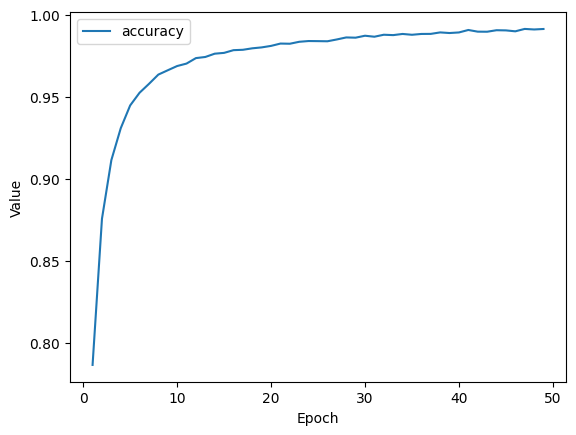

In [25]:
epochs = max_epochs
epochs, hist = train_model(modelA, x_train_normalized, y_train,
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

print("\n Evaluate model A against the test set:")
modelA.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

### Model B
Modified from **Model A** by,
- Convolutional layers:
   - Decreased the number of filters but increased their kernel sizes,
   - Removed padding.
- Changed first Hidden layer to have 128 nodes, and added a second one of 64 nodes.

In [26]:
def create_modelB(my_learning_rate):
  model = tf.keras.models.Sequential()

  # https://colab.research.google.com/drive/1UA-wUXx2QziKgZXTDLVo1gn0xImlwj2H
  model.add(tf.keras.layers.Input((28, 28, 1)))
  model.add(tf.keras.layers.Conv2D(10, 5, activation="relu"))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Conv2D(20, 5, activation="relu"))
  model.add(tf.keras.layers.MaxPool2D())

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))

  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

  return model

In [27]:
modelB = create_modelB(learning_rate)
modelB.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 20)            │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,274 (215.91 KB)

 Trainable params: 55,274 (215.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.3294 - loss: 1.9958 - val_accuracy: 0.8142 - val_loss: 0.6334
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7789 - loss: 0.6697 - val_accuracy: 0.9065 - val_loss: 0.2988
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8902 - loss: 0.3470 - val_accuracy: 0.9450 - val_loss: 0.1807
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9335 - loss: 0.2170 - val_accuracy: 0.9598 - val_loss: 0.1363
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9515 - loss: 0.1611 - val_accuracy: 0.9668 - val_loss: 0.1105
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9630 - loss: 0.1257 - val_accuracy: 0.9744 - val_loss: 0.0867
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9688 - loss: 0.1045 - val_accuracy: 0.9769 - val_loss: 0.0792
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9711 - loss: 0.0939 - val_accuracy: 0.9767 - val_loss:

[0.0364556685090065, 0.9905999898910522]

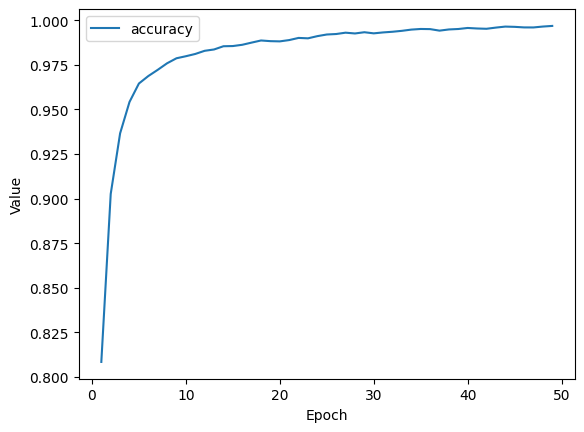

In [35]:
epochs = max_epochs
epochs, hist = train_model(modelB, x_train_normalized, y_train,
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

print("\n Evaluate model B against the test set:")
modelB.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

### Evaluation

In [49]:
def make_cl_report(predictions, test_lbl):
  predicted = np.argmax(predictions, 1)
  realistic = test_lbl
  labels = ["Digit %d" % label for label in range(0,10)]
  print(classification_report(realistic, predicted, target_names=labels))

def make_conf_mat(predictions, test_lbl):
  predicted = np.argmax(predictions, 1)
  realistic = test_lbl
  columns = ["Digit %d" % label for label in range(0, 10)]
  index = ["Digit %d" % label for label in range(0, 10)]
  print("Columns are predicted. Rows are actual.")
  print(pd.DataFrame(confusion_matrix(realistic, predicted), columns=columns, index=index))

predA = modelA.predict(x_test_normalized)
predB = modelB.predict(x_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [62]:
print("Classification report for modelA:")
make_cl_report(predA, y_test)
print("Classification report for modelB")
make_cl_report(predB, y_test)

Classification report for modelA:
              precision    recall  f1-score   support

     Digit 0       0.98      1.00      0.99       980
     Digit 1       1.00      1.00      1.00      1135
     Digit 2       0.98      1.00      0.99      1032
     Digit 3       0.99      0.99      0.99      1010
     Digit 4       0.99      0.99      0.99       982
     Digit 5       0.99      0.98      0.98       892
     Digit 6       0.99      0.98      0.99       958
     Digit 7       0.99      0.99      0.99      1028
     Digit 8       0.99      0.99      0.99       974
     Digit 9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Classification report for modelB
              precision    recall  f1-score   support

     Digit 0       0.99      1.00      0.99       980
     Digit 1       1.00      0.99      0.99      1135
     Digit 

In [64]:
print("Confusion matrix for modelA:")
predicted = np.argmax(predA, 1)
realistic = y_test
columns = ["Digit %d" % label for label in range(0, 10)]
index = ["Digit %d" % label for label in range(0, 10)]
print("Columns are predicted. Rows are actual.")
pd.DataFrame(confusion_matrix(realistic, predicted), columns=columns, index=index)

Confusion matrix for modelA:
Columns are predicted. Rows are actual.


,Digit 0,Digit 1,Digit 2,Digit 3,Digit 4,Digit 5,Digit 6,Digit 7,Digit 8,Digit 9
Digit 0,977,0,1,1,0,0,1,0,0,0
Digit 1,0,1130,3,0,0,1,0,1,0,0
Digit 2,2,0,1027,1,1,0,0,1,0,0
Digit 3,0,0,2,1001,0,3,0,0,3,1
Digit 4,0,0,1,0,973,0,0,1,2,5
Digit 5,3,0,1,5,0,877,3,1,1,1
Digit 6,5,2,0,0,3,4,943,0,1,0
Digit 7,0,1,6,3,0,0,0,1014,1,3
Digit 8,2,0,2,1,0,0,1,2,965,1
Digit 9,3,1,0,0,4,5,0,1,2,993


In [65]:
print("Confusion matrix for modelB:")
predicted = np.argmax(predB, 1)
realistic = y_test
columns = ["Digit %d" % label for label in range(0, 10)]
index = ["Digit %d" % label for label in range(0, 10)]
print("Columns are predicted. Rows are actual.")
pd.DataFrame(confusion_matrix(realistic, predicted), columns=columns, index=index)

Confusion matrix for modelB:
Columns are predicted. Rows are actual.


,Digit 0,Digit 1,Digit 2,Digit 3,Digit 4,Digit 5,Digit 6,Digit 7,Digit 8,Digit 9
Digit 0,976,0,0,0,0,0,1,1,2,0
Digit 1,0,1126,1,1,0,0,1,3,2,1
Digit 2,2,0,1023,2,1,0,0,3,1,0
Digit 3,0,0,1,1001,0,4,0,1,3,0
Digit 4,0,0,1,0,972,0,1,2,0,6
Digit 5,1,0,0,5,0,879,2,1,2,2
Digit 6,4,2,0,0,1,1,949,0,1,0
Digit 7,0,1,3,1,0,0,0,1020,1,2
Digit 8,2,0,2,1,0,1,0,2,964,2
Digit 9,0,2,0,0,2,3,0,6,0,996


### Conclusion
- Compared to `modelA`, the *modifications made in Convolutional layers* for `modelB` **reduce training time significantly**, while still maintaining **the same, if not better, `accurracy`**.
- The *change and addition to Hidden layers* also seem to **contribute to the slight rise in `accuracy`**, both during training and evaluation.
- However, for actual predictions, when doing classification report and confusion matrix, **both models yield virtually no difference**.
- Still, we can state with a certain confidence that **`modelB` is superior**, marginally.